In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import swissknife as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("../../data/songs-prediction/train_x.csv")
data_test = pd.read_csv("../../data/songs-prediction/test_x.csv")
target = pd.read_csv("../../data/songs-prediction/train_y.csv")

In [3]:
data_train = data_train.set_index("id").join(target.set_index("id"),on="id")
data_train = data_train.reset_index()
data_train = data_train.drop("id",axis=1)

In [4]:
print(len(data_train["year"].unique()))
print(data_train["year"].mean())

79
1998.3667142857144


In [5]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# data_train["year"] = data_train["year"].astype(str)
# data_train["year"] = le.fit_transform(data_train["year"])
# print(le.classes_)

In [6]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,year
0,37.47518,-14.34414,40.54872,-9.10171,16.77175,-17.77113,-16.50156,-4.09543,2.49723,-0.46428,...,-115.62803,-13.79660,31.60436,28.95927,-25.93164,67.64670,-25.76691,-81.90373,-61.48682,2001
1,48.17393,-7.02208,-30.36086,-2.41924,2.15406,-8.44502,-1.68191,-8.71434,-7.83802,-5.58019,...,24.58950,-36.95682,0.73922,-0.06330,53.75838,-81.05330,8.42811,12.08694,-1.91676,2006
2,36.58141,26.03203,-4.92774,35.71620,8.53080,3.73167,-7.98443,-7.43976,-1.69797,10.75028,...,-366.07968,-62.38201,113.48188,4.72741,181.64459,-134.46216,8.50795,94.15573,-8.47276,1989
3,41.15615,-17.77029,-32.30961,-21.03778,12.80330,-13.48031,-3.14951,-7.62647,-4.48901,-4.29075,...,-79.64532,-77.08169,38.88094,28.52025,24.17783,-86.62542,-1.19418,-74.73449,-17.28130,1997
4,40.54855,78.77563,-23.29877,98.60192,-30.11496,26.94220,-8.87771,-3.23280,-1.04841,31.69655,...,-252.61021,118.93768,-155.87390,51.85666,-365.15815,59.34936,52.47311,99.00695,-10.18840,2001


In [7]:
def weights_like(vector):
    vector = torch.Tensor(vector) 
    weights = torch.ones_like(vector)
    weights[vector < 30] = 10
    weights[(vector >= 30) & (vector<= 55)] = 2
    weights[vector > 55] = 0.85
    return weights

In [8]:
enc = {}
rev_enc = {}
for i,item in enumerate(sorted(data_train["year"].unique())):
    enc |= {str(item):i}
    rev_enc |= {str(i):item}
print(enc)
print(rev_enc)

data_train["year"] = data_train["year"].map(lambda q: enc[str(q)])
data_train.head()

{'1922': 0, '1925': 1, '1926': 2, '1927': 3, '1928': 4, '1929': 5, '1930': 6, '1931': 7, '1935': 8, '1940': 9, '1941': 10, '1942': 11, '1943': 12, '1945': 13, '1946': 14, '1948': 15, '1949': 16, '1950': 17, '1951': 18, '1952': 19, '1953': 20, '1954': 21, '1955': 22, '1956': 23, '1957': 24, '1958': 25, '1959': 26, '1960': 27, '1961': 28, '1962': 29, '1963': 30, '1964': 31, '1965': 32, '1966': 33, '1967': 34, '1968': 35, '1969': 36, '1970': 37, '1971': 38, '1972': 39, '1973': 40, '1974': 41, '1975': 42, '1976': 43, '1977': 44, '1978': 45, '1979': 46, '1980': 47, '1981': 48, '1982': 49, '1983': 50, '1984': 51, '1985': 52, '1986': 53, '1987': 54, '1988': 55, '1989': 56, '1990': 57, '1991': 58, '1992': 59, '1993': 60, '1994': 61, '1995': 62, '1996': 63, '1997': 64, '1998': 65, '1999': 66, '2000': 67, '2001': 68, '2002': 69, '2003': 70, '2004': 71, '2005': 72, '2006': 73, '2007': 74, '2008': 75, '2009': 76, '2010': 77, '2011': 78}
{'0': 1922, '1': 1925, '2': 1926, '3': 1927, '4': 1928, '5': 

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,year
0,37.47518,-14.34414,40.54872,-9.10171,16.77175,-17.77113,-16.50156,-4.09543,2.49723,-0.46428,...,-115.62803,-13.79660,31.60436,28.95927,-25.93164,67.64670,-25.76691,-81.90373,-61.48682,68
1,48.17393,-7.02208,-30.36086,-2.41924,2.15406,-8.44502,-1.68191,-8.71434,-7.83802,-5.58019,...,24.58950,-36.95682,0.73922,-0.06330,53.75838,-81.05330,8.42811,12.08694,-1.91676,73
2,36.58141,26.03203,-4.92774,35.71620,8.53080,3.73167,-7.98443,-7.43976,-1.69797,10.75028,...,-366.07968,-62.38201,113.48188,4.72741,181.64459,-134.46216,8.50795,94.15573,-8.47276,56
3,41.15615,-17.77029,-32.30961,-21.03778,12.80330,-13.48031,-3.14951,-7.62647,-4.48901,-4.29075,...,-79.64532,-77.08169,38.88094,28.52025,24.17783,-86.62542,-1.19418,-74.73449,-17.28130,64
4,40.54855,78.77563,-23.29877,98.60192,-30.11496,26.94220,-8.87771,-3.23280,-1.04841,31.69655,...,-252.61021,118.93768,-155.87390,51.85666,-365.15815,59.34936,52.47311,99.00695,-10.18840,68


<Axes: xlabel='year', ylabel='Count'>

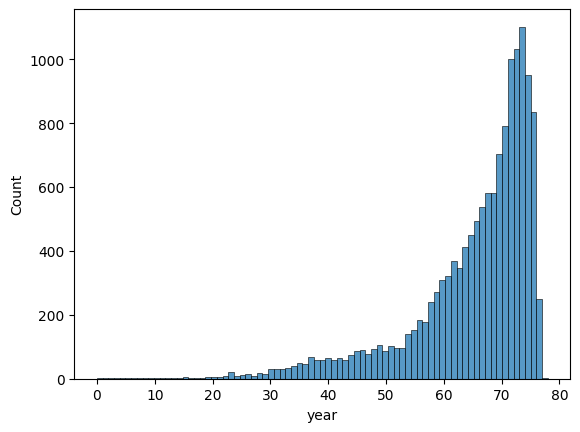

In [9]:
sns.histplot(x=data_train["year"])

In [10]:
# data cleaning 
save = len(data_train)
data_train = sk.cleaner(data_train,data_train.columns.drop("year"), 0.99958, 0.00043)

In [11]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,year
0,37.47518,-14.34414,40.54872,-9.10171,16.77175,-17.77113,-16.50156,-4.09543,2.49723,-0.46428,...,-115.62803,-13.79660,31.60436,28.95927,-25.93164,67.64670,-25.76691,-81.90373,-61.48682,68
1,48.17393,-7.02208,-30.36086,-2.41924,2.15406,-8.44502,-1.68191,-8.71434,-7.83802,-5.58019,...,24.58950,-36.95682,0.73922,-0.06330,53.75838,-81.05330,8.42811,12.08694,-1.91676,73
2,36.58141,26.03203,-4.92774,35.71620,8.53080,3.73167,-7.98443,-7.43976,-1.69797,10.75028,...,-366.07968,-62.38201,113.48188,4.72741,181.64459,-134.46216,8.50795,94.15573,-8.47276,56
3,41.15615,-17.77029,-32.30961,-21.03778,12.80330,-13.48031,-3.14951,-7.62647,-4.48901,-4.29075,...,-79.64532,-77.08169,38.88094,28.52025,24.17783,-86.62542,-1.19418,-74.73449,-17.28130,64
5,52.33593,2.89543,56.90252,8.96987,-25.76965,-15.71307,3.50595,-8.96479,1.19235,-4.97747,...,37.47755,-14.58737,120.49606,-14.30169,-75.96685,40.57184,0.99512,60.78252,-15.17380,76


In [12]:
print(len(data_train)/save)

0.9670714285714286


In [13]:
data_train["0^2"] = data_train["0"]**2
data_train["6^2"] = data_train["6"]**2
data_train["46^2"] = data_train["46"]**2
data_train["5^2"] = data_train["5"]**2
data_train["36^2"] = data_train["36"]**2
data_train["62^2"] = data_train["62"]**2

In [14]:
data_test["0^2"] = data_test["0"]**2
data_test["6^2"] = data_test["6"]**2
data_test["46^2"] = data_test["46"]**2
data_test["5^2"] = data_test["5"]**2
data_test["36^2"] = data_test["36"]**2
data_test["62^2"] = data_test["62"]**2

<Axes: xlabel='year', ylabel='0'>

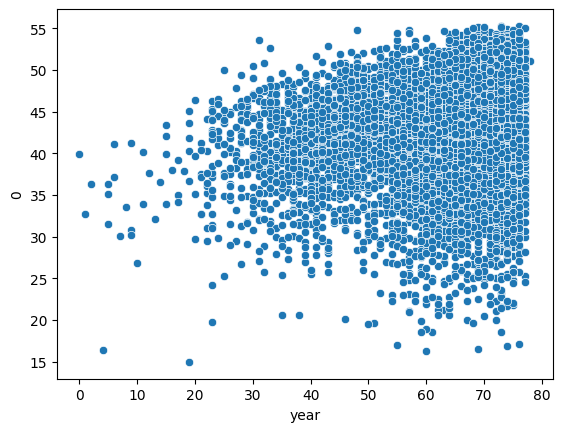

In [15]:
sns.scatterplot(data_train, x="year", y="0")

<Axes: xlabel='year', ylabel='Count'>

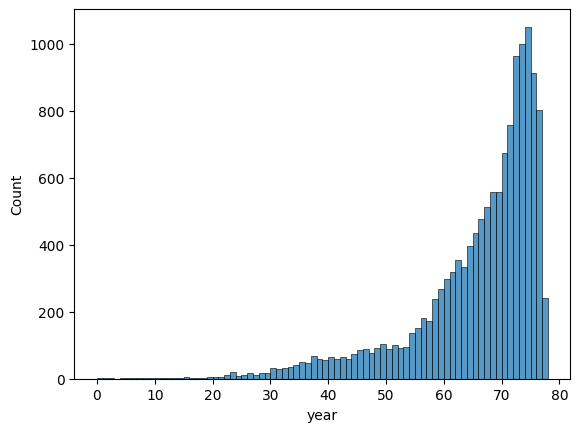

In [16]:
sns.histplot(x=data_train["year"])

<Axes: >

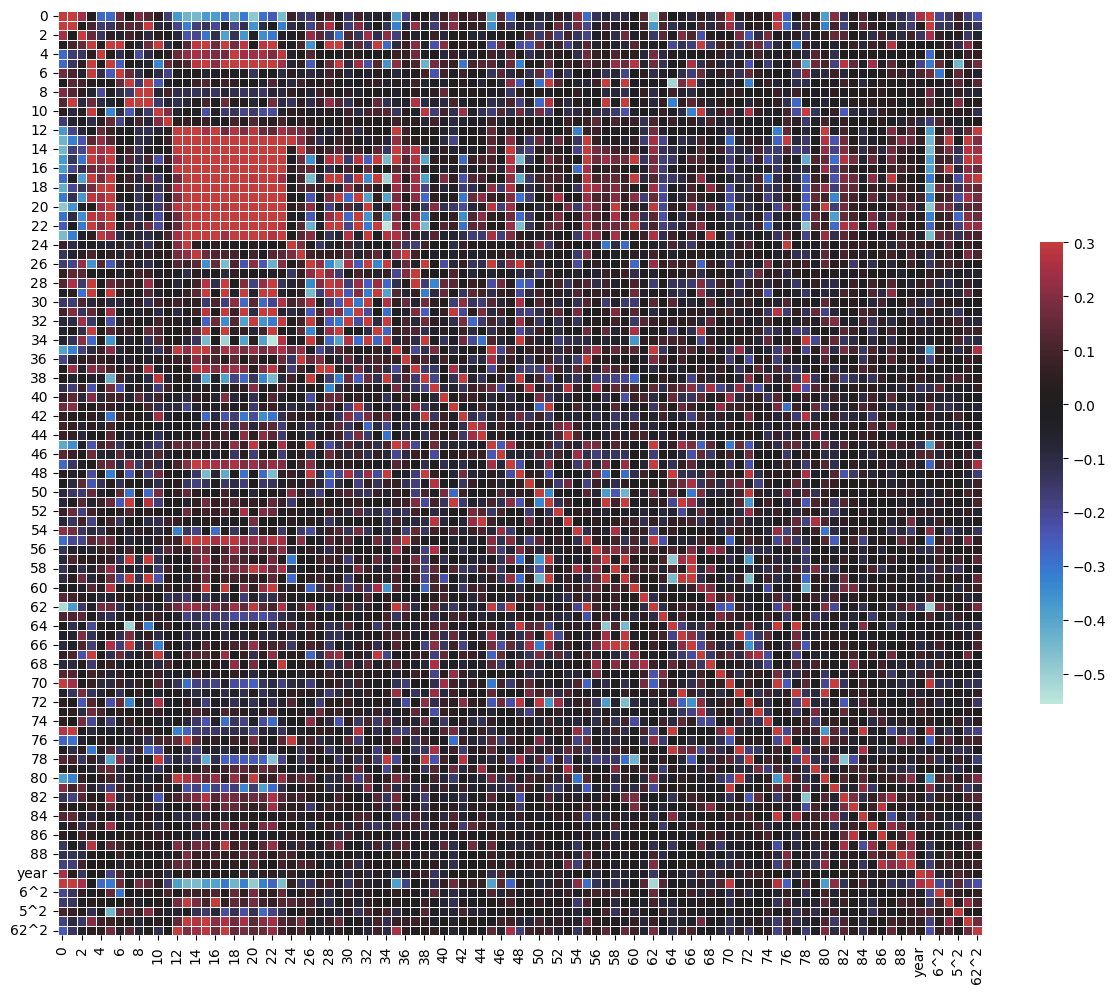

In [17]:
corr = data_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
id = data_test["id"]
data_test = data_test.drop("id",axis=1)

data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,0^2,6^2,46^2,5^2,36^2,62^2
0,44.69970,7.96998,-15.16859,-15.88686,1.58073,-6.23497,-11.59792,-11.71405,4.32023,-8.56689,...,-54.54467,-2.53457,19.44396,8.74708,1998.063180,134.511748,46762.431989,38.874851,533.102845,61.406344
1,50.75305,49.55872,30.33403,-13.05537,-34.51915,-21.38223,1.07836,-7.79340,15.95731,8.97746,...,53.55449,-21.83976,-46.89782,-12.17533,2575.872084,1.162860,58835.586458,457.199760,13087.009938,1468.085203
2,39.41930,-38.69590,-22.15177,-4.07812,-19.06480,-11.15927,14.99402,2.75120,2.32396,4.29177,...,-162.58971,-6.31094,-116.44189,-7.85765,1553.881212,224.820636,277.963920,124.529307,222139.403420,433.794337
3,46.67711,56.98689,-22.63047,-10.90758,4.69374,15.66760,-7.25281,13.54849,-1.37275,16.10065,...,-246.54612,2.13762,27.88064,-13.57062,2178.752598,52.603253,81780.859861,245.473690,195.501358,216.262318
4,40.14486,-20.88083,-7.30665,-1.21121,27.23754,-22.98837,-1.81173,-2.44144,0.06913,-3.55877,...,-14.54322,-7.52484,-57.88128,0.91497,1611.609784,3.282366,6437.794835,528.465155,47724.828400,6.676901


In [19]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(96, 24),
            nn.PReLU(),
            nn.Linear(24, 10),
            nn.PReLU(),
            nn.Linear(10, 10),
            nn.PReLU(),
            nn.Linear(10, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 6),
            nn.PReLU(),
            nn.Linear(6, 4),
            nn.PReLU(),
            nn.Linear(4, 6),
            nn.PReLU(),
            nn.Linear(6, 12),
            nn.Tanhshrink(),
            nn.Linear(12, 12),
            nn.Tanhshrink(),
            nn.Linear(12, 8),
            nn.Tanhshrink(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        value = self.fc(x)
        return value
    
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (fc): Sequential(
    (0): Linear(in_features=96, out_features=24, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=24, out_features=10, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=10, out_features=6, bias=True)
    (7): PReLU(num_parameters=1)
    (8): Linear(in_features=6, out_features=6, bias=True)
    (9): PReLU(num_parameters=1)
    (10): Linear(in_features=6, out_features=6, bias=True)
    (11): PReLU(num_parameters=1)
    (12): Linear(in_features=6, out_features=6, bias=True)
    (13): PReLU(num_parameters=1)
    (14): Linear(in_features=6, out_features=6, bias=True)
    (15): PReLU(num_parameters=1)
    (16): Linear(in_features=6, out_features=6, bias=True)
    (17): PReLU(num_parameters=1)
    (18): Linear(in_features=6, out_features=6, bias=True)
    (19): PReLU(num_parameters=1)
    (20): Linear(in_features=6, out_fe

In [20]:
from torch.utils.data import DataLoader

dataset_train, dataset_test = sk.data_crusher(data_train, "year", 0.2, 17, to="torch")

dataset_train.set_weights(weights_like(data_train["year"]))

trainloader = DataLoader(dataset_train, batch_size = 500, shuffle=True)
testloader = DataLoader(dataset_test, batch_size = len(dataset_test), shuffle=True)

In [21]:
def train(dataloader:torch.utils.data.DataLoader, model:NeuralNetwork, loss_fn, optimizer, time) -> float:
    batch_loss = 0.
    for batch_idx, (inputs, weights, targets) in enumerate(dataloader):
        model.train()
        preds = model(inputs.to(torch.float32))
        loss = loss_fn(preds.reshape(-1), targets.to(torch.float32), weights)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss += loss
    if time % 50 == 0:
        print(f"Mean batch train loss: {batch_loss/len(dataloader)}")

def test(dataloader: torch.utils.data.DataLoader, model:NeuralNetwork, loss_fn, time) -> float:
    batch_loss = 0.
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        model.eval()
        preds = model(inputs.to(torch.float32))
        loss = loss_fn(preds.reshape(-1), targets.to(torch.float32))
        batch_loss += loss
    if time % 50 == 0:
        print(f"Test loss: {batch_loss/len(dataloader)}")
    return batch_loss


In [22]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_train = sk.WeightedMSELoss()
loss_test = nn.MSELoss()

In [24]:
epochs = 1000
minloss = 3918282390
for t in range(epochs+1):
    if t%50 == 0:
        print(f"Epoch {t}, best loss: {minloss}\n----------------")
    train(trainloader, model, loss_train, optimizer, t)
    l = test(testloader, model, loss_test, t)
    if minloss > l:
        minloss = l
        pred = model(torch.Tensor(data_test.values))
        out = pd.DataFrame()
        out["id"] = id
        out["year"] = pred.detach().numpy()
        for i,item in enumerate(out["year"]):
            if item > 78:
                out.loc[i, "year"] = 78
            if item < 0:
                out.loc[i, "year"] = 0
        out["year"] = out["year"].astype(int).map(lambda q: rev_enc[str(q)])
        out.to_csv("subsubm.csv",index=False)


Epoch 0, best loss: 3918282390
----------------
Mean batch train loss: 1280.4920654296875
Test loss: 2757.034912109375
Epoch 50, best loss: 118.5316162109375
----------------
Mean batch train loss: 49.88388442993164
Test loss: 119.39913177490234
Epoch 100, best loss: 118.33712768554688
----------------
Mean batch train loss: 49.14907455444336
Test loss: 118.68758392333984
Epoch 150, best loss: 109.33611297607422
----------------
Mean batch train loss: 42.52372741699219
Test loss: 109.34332275390625
Epoch 200, best loss: 104.74987030029297
----------------
Mean batch train loss: 40.649784088134766
Test loss: 107.8050765991211
Epoch 250, best loss: 103.8226318359375
----------------
Mean batch train loss: 39.09542465209961
Test loss: 111.01387023925781
Epoch 300, best loss: 103.43186950683594
----------------
Mean batch train loss: 35.13674545288086
Test loss: 104.29528045654297


KeyboardInterrupt: 

In [28]:
print(type(None))

<class 'NoneType'>


best so far 84.4166?  -> tdv2.csv

In [23]:
block = True
if block == False:
    torch.save(model,"models/trash_loss.pth")

In [24]:
pred = model(torch.Tensor(data_test.values))

NameError: name 'model' is not defined

In [22]:
out = pd.DataFrame()
out["id"] = id
out["year"] = pred.detach().numpy()
# for i,item in enumerate(out["year"]):
#     if item > 78:
#         out.loc[i, "year"] = 78
#     if item < 0:
#         out.loc[i, "year"] = 0
out["year"] = out["year"].astype(int).map(lambda q: rev_enc[str(q)])
out.to_csv("subm.csv",index=False)

NameError: name 'pred' is not defined